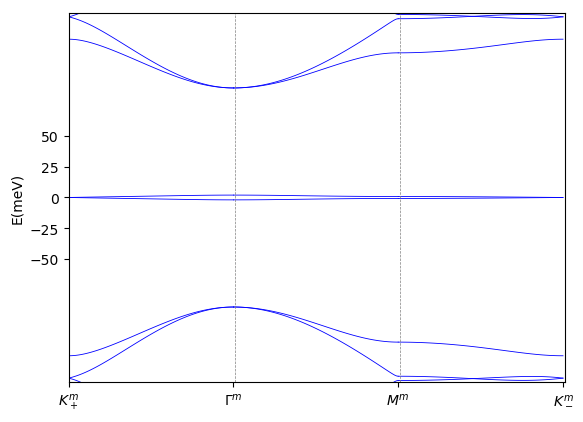

In [1]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.05/180.0*np.pi          #degree
u0     = 0.0          #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-150,150)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()



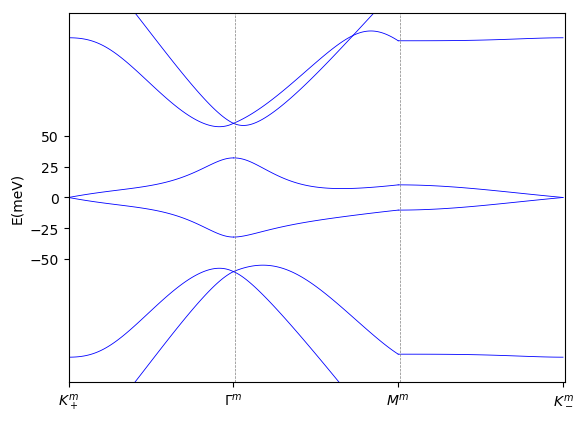

In [6]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.35/180.0*np.pi          #degree
u0     = 79.7           #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-150,150)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()


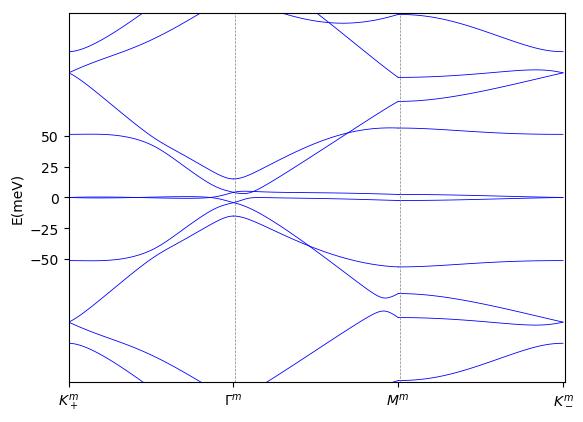

In [7]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 0.92/180.0*np.pi          #degree
u0     = 79.7           #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-150,150)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()


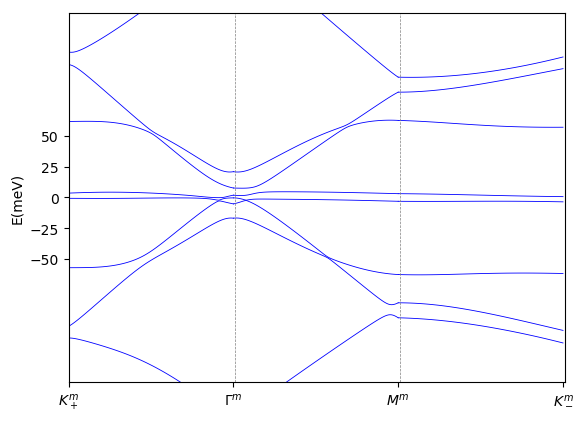

In [8]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 0.92/180.0*np.pi          #degree
u0     = 79.7           #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 1              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-150,150)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()


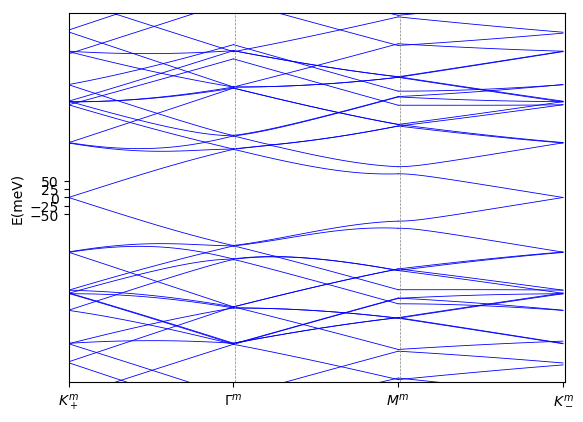

In [12]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.05/180.0*np.pi          #degree
u0     = 10.7           #mev interlayer tunnelling
u1     = 10.7
a      = 1.420          #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-550,550)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()


[[-4. -4.]
 [-4. -3.]
 [-4. -2.]
 [-4. -1.]
 [-4.  0.]
 [-4.  1.]
 [-4.  2.]
 [-4.  3.]
 [-4.  4.]
 [-3. -4.]
 [-3. -3.]
 [-3. -2.]
 [-3. -1.]
 [-3.  0.]
 [-3.  1.]
 [-3.  2.]
 [-3.  3.]
 [-3.  4.]
 [-2. -4.]
 [-2. -3.]
 [-2. -2.]
 [-2. -1.]
 [-2.  0.]
 [-2.  1.]
 [-2.  2.]
 [-2.  3.]
 [-2.  4.]
 [-1. -4.]
 [-1. -3.]
 [-1. -2.]
 [-1. -1.]
 [-1.  0.]
 [-1.  1.]
 [-1.  2.]
 [-1.  3.]
 [-1.  4.]
 [ 0. -4.]
 [ 0. -3.]
 [ 0. -2.]
 [ 0. -1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  2.]
 [ 0.  3.]
 [ 0.  4.]
 [ 1. -4.]
 [ 1. -3.]
 [ 1. -2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 2. -4.]
 [ 2. -3.]
 [ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]
 [ 2.  3.]
 [ 2.  4.]
 [ 3. -4.]
 [ 3. -3.]
 [ 3. -2.]
 [ 3. -1.]
 [ 3.  0.]
 [ 3.  1.]
 [ 3.  2.]
 [ 3.  3.]
 [ 3.  4.]
 [ 4. -4.]
 [ 4. -3.]
 [ 4. -2.]
 [ 4. -1.]
 [ 4.  0.]
 [ 4.  1.]
 [ 4.  2.]
 [ 4.  3.]
 [ 4.  4.]]


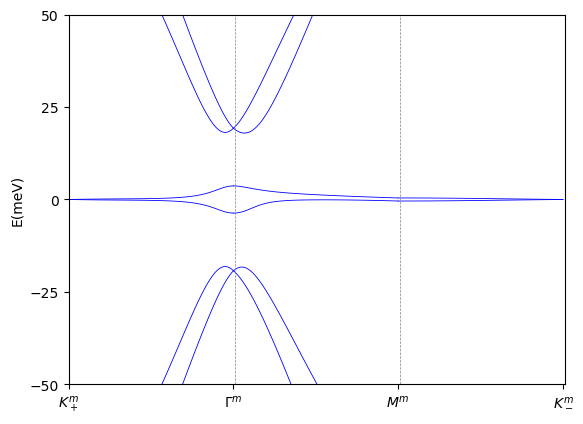

In [16]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.05/180.0*np.pi          #degree
u0     = 79.7           #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
print(L)
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        

        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(-50,50)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()



In [13]:
'''
Author: zihaophys
Description: This is for continuum model's moire bands of TBG
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 5           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 5              #truncate range
valley = +1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e


kD = -qb[1]
KtoKp = np.arange(-1/2, 1/2, 1/KDens)
KptoG = np.arange(1/2, 0, -1/2/KDens)
GtoM  = np.arange(0, sqrt(3)/2, 1/KDens)
MtoK  = np.arange(-sqrt(3)/4, -sqrt(3)/2, -1/KDens)

AllK  = len(KtoKp) + len(KptoG) + len(GtoM) + len(MtoK)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0,len(KtoKp)):
    k = KtoKp[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD,k*kD))
for i in range(len(KtoKp), len(KptoG)+len(KtoKp)):
    k = KptoG[i-len(KtoKp)]
    E[i] = np.real(Hamiltonian(sqrt(3)*k*kD, k*kD))
for i in range(len(KtoKp)+len(KptoG), len(KtoKp)+len(KptoG)+len(GtoM)):
    k = GtoM[i-len(KtoKp)-len(KptoG)]
    E[i] = np.real(Hamiltonian(-1/2.0*k*kD, -sqrt(3)/2*k*kD))
for i in range(len(KtoKp)+len(KptoG)+len(GtoM), AllK):
    k = MtoK[i-len(KtoKp)-len(KptoG)-len(GtoM)]
    E[i] = np.real(Hamiltonian(k*kD, (-1/sqrt(3)*k-1.0)*kD))


for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-1200,1200)
plt.xticks([0, len(KtoKp), len(KptoG)+len(KtoKp), len(KtoKp)+len(KptoG)+len(GtoM), AllK], ('K', "K$^‘$", '$\Gamma$', 'M', 'K'), fontsize=20)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

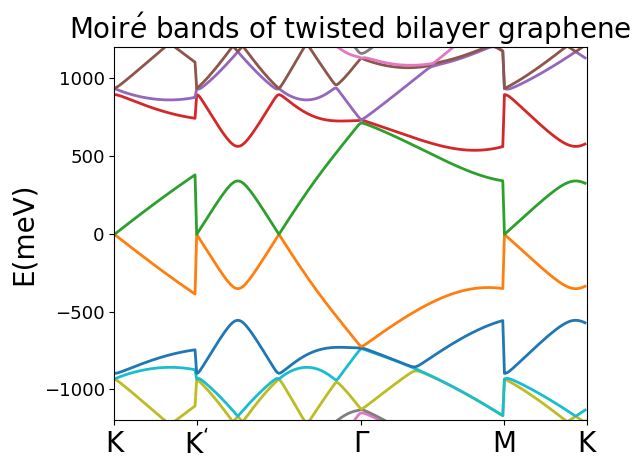

In [21]:
'''
Author: zihaophys
Description: This is for continuum model's moire bands of TBG
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 5           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 5              #truncate range
valley = +1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e


kD = -qb[1]
KtoKp = np.arange(1/2, 1, 1/KDens)
KptoG = np.arange(1, 0, -1/KDens)
GtoM  = np.arange(0, sqrt(3)/2, 1/KDens)
MtoK  = np.arange(0,-1/2, -1/KDens)

AllK  = len(KtoKp) + len(KptoG) + len(GtoM) + len(MtoK)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0,len(KtoKp)):
    k = KtoKp[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD,k*kD))
for i in range(len(KtoKp), len(KptoG)+len(KtoKp)):
    k = KptoG[i-len(KtoKp)]
    E[i] = np.real(Hamiltonian(sqrt(3)*k*kD, k*kD))
for i in range(len(KtoKp)+len(KptoG), len(KtoKp)+len(KptoG)+len(GtoM)):
    k = GtoM[i-len(KtoKp)-len(KptoG)]
    E[i] = np.real(Hamiltonian(-1/2.0*k*kD, -sqrt(3)/2*k*kD))
for i in range(len(KtoKp)+len(KptoG)+len(GtoM), AllK):
    k = MtoK[i-len(KtoKp)-len(KptoG)-len(GtoM)]
    E[i] = np.real(Hamiltonian(k*kD, (-1/sqrt(3)*k-1.0)*kD))


for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-1200,1200)
plt.xticks([0, len(KtoKp), len(KptoG)+len(KtoKp), len(KtoKp)+len(KptoG)+len(GtoM), AllK], ('K', "K$^‘$", '$\Gamma$', 'M', 'K'), fontsize=20)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

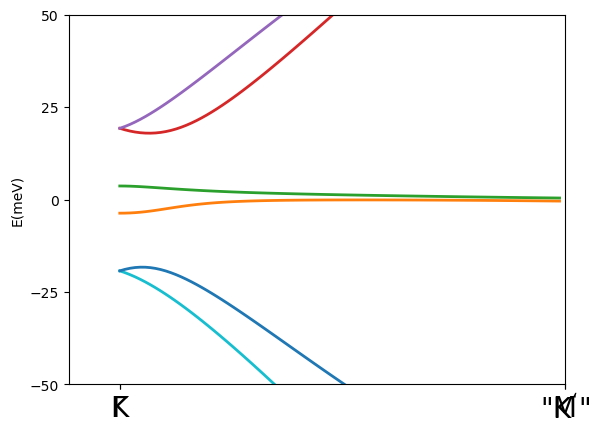

In [12]:
'''
 This is for continuum model moire bands of Twisted bilayer graphene
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.05/180.0*np.pi          #degree
u0     = 79.7           #mev interlayer tunnelling
u1     = 97.5
a      = 2.46           #lattice constant
hv     = 2135.4 * a     #meV*angstrom
N      = 4              #truncate range
valley = 1              #valley index

I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

bm=8*np.pi*sin(theta/2)/(a*3)
G1     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([-0.5, -np.sqrt(3)/2])
G2     = 8*np.pi*sin(theta/2)/(a*sqrt(3))*np.array([1, 0])
K1     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/(a*3)*array([sqrt(3)/2,0.5])

T1    = np.array([[u0,u1], [u1,u0]], dtype=complex)
T2   = np.array([[u0,u1*ei240], [u1*ei120, u0]], dtype=complex)
T3   = np.array([[u0,u1*ei120], [u1*ei240, u0]], dtype=complex)


waven=(2*N+1)**2
k=0;
L=np.array(zeros((waven, 2)))

for i in np.arange(2*N+1):
  for j in np.arange(2*N+1):
      L[k,0]=i-N
      L[k,1]=j-N
      k=k+1
      
def Hamiltonian(kx,ky):
    H = array(zeros((4*waven, 4*waven)), dtype=complex)
    for i in range(0,waven):
       
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx -K1[0]+ n1*G1[0] + n2*G2[0]
        qy1 = ky -K1[1]+ n1*G1[1] + n2*G2[1]
        qx2 = kx -K2[0]+ n1*G1[0] + n2*G2[0] 
        qy2 = ky -K2[1]+ n1*G1[1] + n2*G2[1] 
        H[2*i, 2*i+1] = -hv*(valley*qx1 - I*qy1)
        H[2*i+1, 2*i] = -hv*(valley*qx1 + I*qy1)
        H[2*i+2*waven, 2*i+2*waven+1] =  -hv*(valley*qx2-I*qy2)
        H[2*i+2*waven+1, 2*i+2*waven] =  -hv*(valley*qx2+I*qy2)
        for j in np.arange(0,waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if (i == j):
                H[2*i, 2*j+2*waven]     = T1[0, 0]
                H[2*i, 2*j+2*waven+1]   = T1[0, 1]
                H[2*i+1, 2*j+2*waven]   = T1[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T1[1, 1]

                H[2*j+2*waven, 2*i]     = T1[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T1[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T1[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T1[1, 1].conjugate()

            if (m1-n1==-valley and m2==n2):
                H[2*i, 2*j+2*waven]    = T2[0, 0]
                H[2*i, 2*j+2*waven+1]   = T2[0, 1]
                H[2*i+1, 2*j+2*waven]   = T2[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T2[1, 1]

                H[2*j+2*waven, 2*i]     = T2[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T2[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T2[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T2[1, 1].conjugate()
            if (m1-n1==-valley and m2-n2==-valley):
                H[2*i, 2*j+2*waven]     = T3[0, 0]
                H[2*i, 2*j+2*waven+1]   = T3[0, 1]
                H[2*i+1, 2*j+2*waven]   = T3[1, 0]
                H[2*i+1, 2*j+2*waven+1] = T3[1, 1]

                H[2*j+2*waven, 2*i]     = T3[0, 0].conjugate()
                H[2*j+2*waven+1,2*i]    = T3[0, 1].conjugate()
                H[2*j+2*waven,2*i+1]    = T3[1, 0].conjugate()
                H[2*j+2*waven+1,2*i+1]  = T3[1, 1].conjugate()


                
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e
#plot bands
M_1 = np.arange(1,0,0.01) # k to G
M_2 = np.arange(0,0.8660,0.01) # G to M
M_3 = np.arange(0,-1.0,0.01) # M to k'

AllK  = len(M_1) + len(M_2) + len(M_3)
E  = np.zeros((AllK,4*waven), float)


for i in range(0,len(M_1)):
    k = M_1[i]
    E[i] = np.real(Hamiltonian(bm*sqrt(3)/2,bm*(1/2)*k))
for i in range(len(M_1), len(M_1)+len(M_2)):
    k = M_2[i-len(M_1)]
    E[i] = np.real(Hamiltonian(k*bm, 0*bm))
for i in range(len(M_1)+len(M_2), AllK):
    k = M_3[i-len(M_1)-len(M_2)]
    E[i] = np.real(Hamiltonian(0.8660*bm, 0.50*k*bm))


for j in range(0,4*waven):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
    

plt.yticks(np.arange(-50, 75, step=25))


plt.xlim(-10, AllK)
plt.ylim(-50,50)
plt.xticks([0, len(M_1), len(M_1)+len(M_2), AllK], ('K', '$\Gamma$', 'M', '"K$^‘$"'), fontsize=20)
plt.ylabel("E(meV)")
plt.show()



[[    0.          +0.j         -6505.67430535-284.04387443j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6505.67430535+284.04387443j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9799.50965986+512.94739122j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9799.50965986-512.94739122j    

[[    0.          +0.j         -6502.3944492 -359.16493066j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6502.3944492 +359.16493066j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9796.22980372+437.82633499j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9796.22980372-437.82633499j    

[[    0.          +0.j         -6499.11459305-434.28598689j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6499.11459305+434.28598689j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9792.94994757+362.70527876j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9792.94994757-362.70527876j    

[[    0.          +0.j         -6495.83473691-509.40704311j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6495.83473691+509.40704311j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9789.67009142+287.58422254j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9789.67009142-287.58422254j    

[[    0.          +0.j         -6492.55488076-584.52809934j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6492.55488076+584.52809934j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9786.39023527+212.46316631j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9786.39023527-212.46316631j    

[[    0.          +0.j         -6489.27502461-659.64915557j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6489.27502461+659.64915557j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9783.11037913+137.34211008j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9783.11037913-137.34211008j    

[[    0.          +0.j         -6485.99516847-734.7702118j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6485.99516847+734.7702118j      0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9779.83052298 +62.22105385j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9779.83052298 -62.22105385j     

[[    0.          +0.j         -6482.71531232-809.89126803j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6482.71531232+809.89126803j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9776.55066683 -12.90000238j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9776.55066683 +12.90000238j    

[[    0.          +0.j         -6479.43545617-885.01232426j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6479.43545617+885.01232426j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9773.27081069 -88.02105861j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9773.27081069 +88.02105861j    

[[    0.          +0.j         -6476.15560002-960.13338049j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6476.15560002+960.13338049j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9769.99095454-163.14211484j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9769.99095454+163.14211484j    

[[    0.           +0.j         -6472.87574388-1035.25443672j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6472.87574388+1035.25443672j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9766.71109839 -238.26317107j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6469.59588773-1110.37549295j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6469.59588773+1110.37549295j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9763.43124224 -313.3842273j ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6466.31603158-1185.49654918j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6466.31603158+1185.49654918j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9760.1513861  -388.50528353j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6498.02443907-1205.69703261j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6498.02443907+1205.69703261j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9726.80305053 -405.86532821j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6564.7211102 -1170.97694324j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6564.7211102 +1170.97694324j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9663.38623555 -365.46436135j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6631.41778133-1136.25685386j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6631.41778133+1136.25685386j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9599.96942057 -325.06339449j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6698.11445245-1101.53676449j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6698.11445245+1101.53676449j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9536.55260559 -284.66242763j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6764.81112358-1066.81667512j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6764.81112358+1066.81667512j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9473.13579061 -244.26146078j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.           +0.j         -6831.50779471-1032.09658575j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [-6831.50779471+1032.09658575j     0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 ...
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j             0.           +0.j        ]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j
      0.           +0.j          9409.71897563 -203.86049392j]
 [    0.           +0.j             0.           +0.j
      0.           +0.j         ...     0.           +0.j


[[    0.          +0.j         -6898.20446583-997.37649638j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6898.20446583+997.37649638j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9346.30216065-163.45952706j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9346.30216065+163.45952706j    

[[    0.          +0.j         -6964.90113696-962.65640701j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-6964.90113696+962.65640701j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9282.88534567-123.0585602j ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9282.88534567+123.0585602j     

[[    0.          +0.j         -7031.59780809-927.93631764j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7031.59780809+927.93631764j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9219.46853069 -82.65759334j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9219.46853069 +82.65759334j    

[[    0.          +0.j         -7098.29447922-893.21622827j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7098.29447922+893.21622827j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9156.05171571 -42.25662648j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9156.05171571 +42.25662648j    

[[    0.          +0.j         -7164.99115034-858.4961389j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7164.99115034+858.4961389j      0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9092.63490073  -1.85565962j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9092.63490073  +1.85565962j     

[[    0.          +0.j         -7231.68782147-823.77604953j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7231.68782147+823.77604953j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          9029.21808575 +38.54530724j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   9029.21808575 -38.54530724j    

[[    0.          +0.j         -7298.3844926 -789.05596016j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7298.3844926 +789.05596016j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8965.80127077 +78.94627409j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8965.80127077 -78.94627409j    

[[    0.          +0.j         -7338.78545946-725.63914518j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7338.78545946+725.63914518j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8931.0811814 +145.64294522j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8931.0811814 -145.64294522j    

[[    0.          +0.j         -7379.18642631-662.2223302j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7379.18642631+662.2223302j      0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8896.36109203+212.33961635j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8896.36109203-212.33961635j     

[[    0.          +0.j         -7419.58739317-598.80551522j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7419.58739317+598.80551522j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8861.64100266+279.03628748j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8861.64100266-279.03628748j    

[[    0.          +0.j         -7459.98836003-535.38870024j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7459.98836003+535.38870024j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8826.92091329+345.7329586j ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8826.92091329-345.7329586j     

[[    0.          +0.j         -7500.38932689-471.97188526j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7500.38932689+471.97188526j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8792.20082392+412.42962973j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8792.20082392-412.42962973j    

[[    0.          +0.j         -7540.79029375-408.55507028j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7540.79029375+408.55507028j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8757.48073455+479.12630086j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8757.48073455-479.12630086j    

[[    0.          +0.j         -7581.19126061-345.1382553j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7581.19126061+345.1382553j      0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8722.76064518+545.82297198j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8722.76064518-545.82297198j     

[[    0.          +0.j         -7621.59222747-281.72144032j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7621.59222747+281.72144032j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8688.04055581+612.51964311j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8688.04055581-612.51964311j    

[[    0.          +0.j         -7661.99319433-218.30462534j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7661.99319433+218.30462534j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8653.32046644+679.21631424j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8653.32046644-679.21631424j    

[[    0.          +0.j         -7702.39416119-154.88781036j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7702.39416119+154.88781036j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8618.60037707+745.91298537j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8618.60037707-745.91298537j    

[[    0.          +0.j         -7744.89121686-108.38017744j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7744.89121686+108.38017744j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8580.31844281+795.94750516j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8580.31844281-795.94750516j    

[[    0.          +0.j         -7818.11864726-155.03119562j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7818.11864726+155.03119562j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8503.30376075+755.85619927j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8503.30376075-755.85619927j    

[[    0.          +0.j         -7891.34607766-201.68221381j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7891.34607766+201.68221381j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8426.2890787 +715.76489338j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8426.2890787 -715.76489338j    

[[    0.          +0.j         -7964.57350806-248.33323199j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-7964.57350806+248.33323199j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8349.27439664+675.67358749j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8349.27439664-675.67358749j    

[[    0.          +0.j         -8037.80093846-294.98425017j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-8037.80093846+294.98425017j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8272.25971458+635.5822816j ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8272.25971458-635.5822816j     

[[    0.          +0.j         -8111.02836886-341.63526835j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [-8111.02836886+341.63526835j     0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 ...
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j             0.          +0.j        ]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
      0.          +0.j          8195.24503252+595.49097572j]
 [    0.          +0.j             0.          +0.j
      0.          +0.j         ...     0.          +0.j
   8195.24503252-595.49097572j    

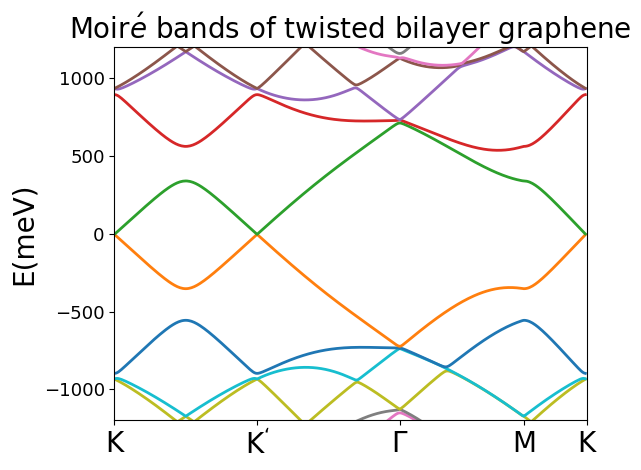

In [1]:
'''
Author: zihaophys
Description: This is for continuum model's moire bands of TBG
'''

from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 5.00           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 5              #truncate range
valley = +1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]

    print(H)
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e


kD = -qb[1]
KtoKp = np.arange(-1/2, 1/2, 1/KDens)
KptoG = np.arange(1/2, 0, -1/2/KDens)
GtoM  = np.arange(0, sqrt(3)/2, 1/KDens)
MtoK  = np.arange(-sqrt(3)/4, -sqrt(3)/2, -1/KDens)

AllK  = len(KtoKp) + len(KptoG) + len(GtoM) + len(MtoK)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0,len(KtoKp)):
    k = KtoKp[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD,k*kD))
for i in range(len(KtoKp), len(KptoG)+len(KtoKp)):
    k = KptoG[i-len(KtoKp)]
    E[i] = np.real(Hamiltonian(sqrt(3)*k*kD, k*kD))
for i in range(len(KtoKp)+len(KptoG), len(KtoKp)+len(KptoG)+len(GtoM)):
    k = GtoM[i-len(KtoKp)-len(KptoG)]
    E[i] = np.real(Hamiltonian(-1/2.0*k*kD, -sqrt(3)/2*k*kD))
for i in range(len(KtoKp)+len(KptoG)+len(GtoM), AllK):
    k = MtoK[i-len(KtoKp)-len(KptoG)-len(GtoM)]
    E[i] = np.real(Hamiltonian(k*kD, (-1/sqrt(3)*k-1.0)*kD))


for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-1200,1200)
plt.xticks([0, len(KtoKp), len(KptoG)+len(KtoKp), len(KtoKp)+len(KptoG)+len(GtoM), AllK], ('K', "K$^‘$", '$\Gamma$', 'M', 'K'), fontsize=20)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()